

**Data Visualization III**

Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers

In [1]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris Dataset (from seaborn)
iris = sns.load_dataset("iris")

# Preview the dataset
print("Dataset:")
print(iris.head())
print(iris.tail())
print(iris.info())
print(iris.describe(include = "all"))
print(iris.shape)
print(iris.size)
print(iris.ndim)
print(iris.columns)
print(iris.dtypes)

Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0 


Feature Types:
sepal_length: Numeric (float64)
sepal_width: Numeric (float64)
petal_length: Numeric (float64)
petal_width: Numeric (float64)
species: Nominal (object)


C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

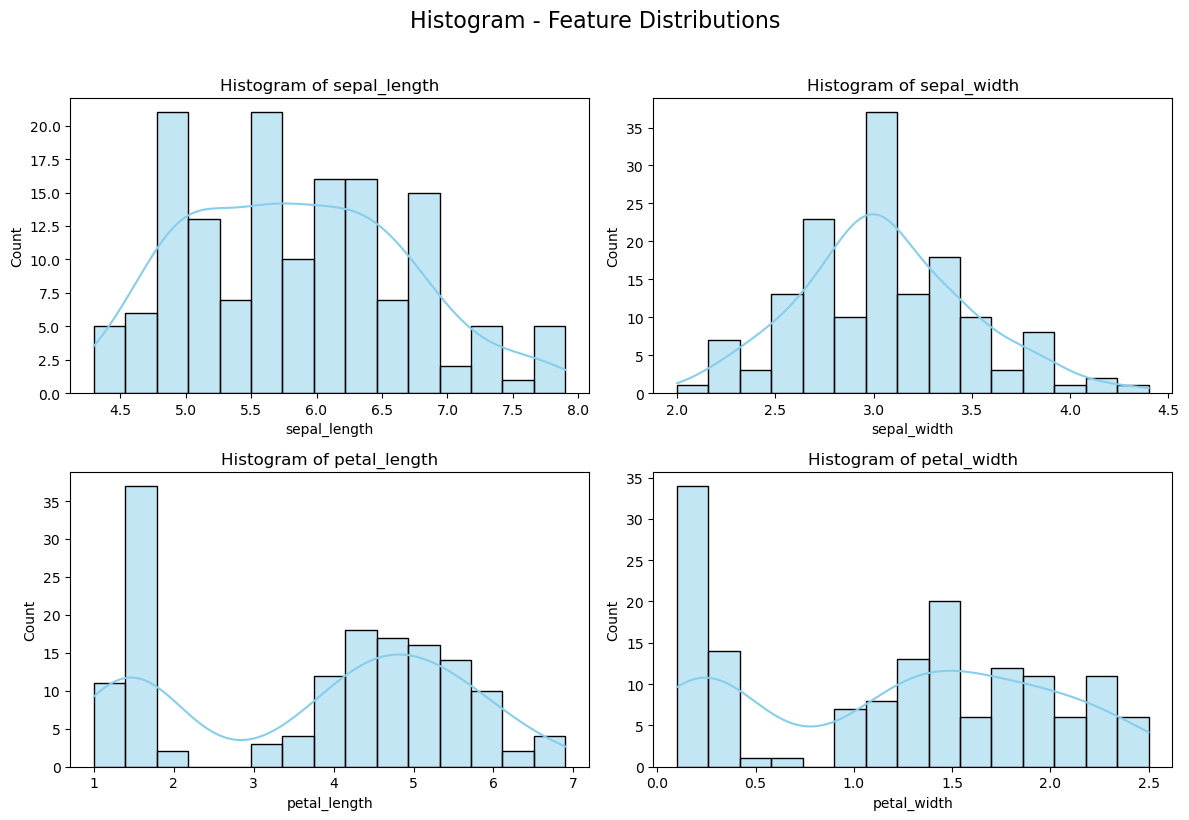

In [6]:

# 1. Feature List and Types
print("\nFeature Types:")
for column in iris.columns:
    dtype = iris[column].dtype
    ftype = "Nominal" if dtype == "object" else "Numeric"
    print(f"{column}: {ftype} ({dtype})")

# 2. Histograms for Each Numeric Feature
iris_numeric = iris.drop(columns='species')

# Plot histograms using Seaborn
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_numeric.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_numeric,bins=15, x=iris[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')

plt.suptitle("Histogram - Feature Distributions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

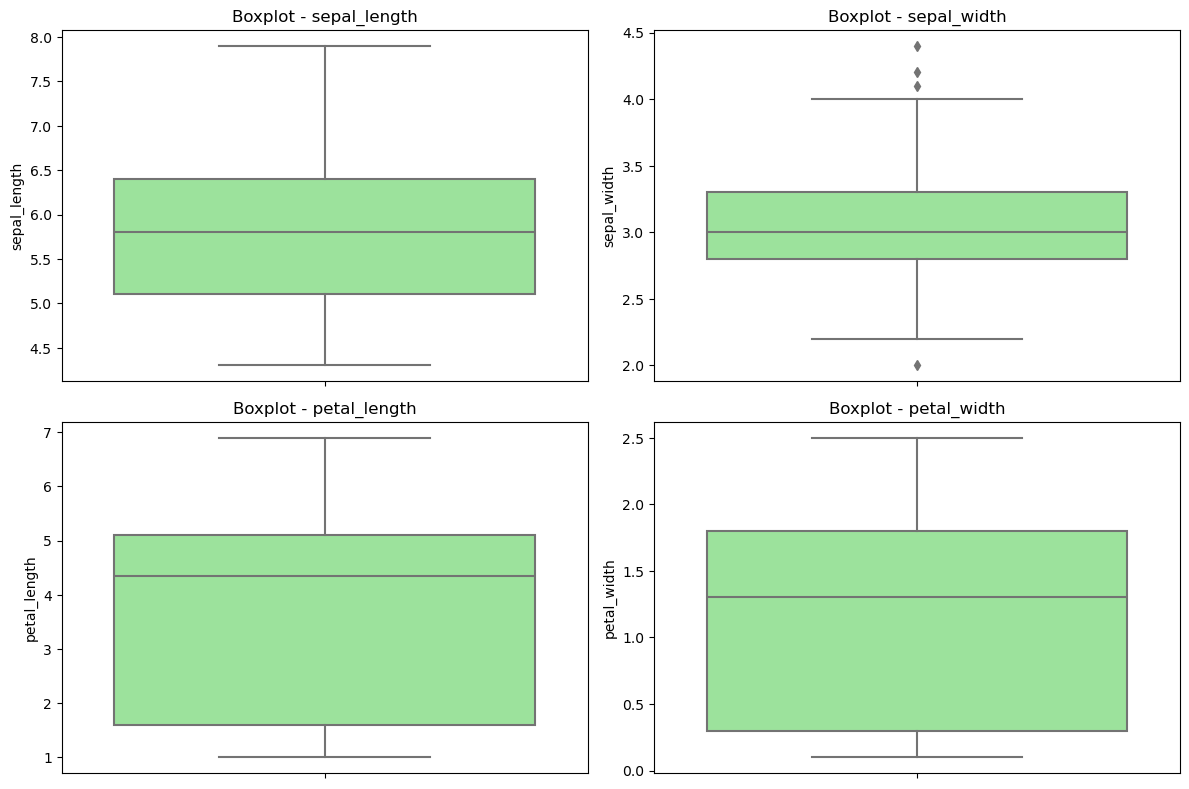

In [5]:
# 3. Boxplots for Each Feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris_numeric.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=iris[col], color='lightgreen')
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()


In [9]:
# 4. Observations
print("\nObservations & Inference:")

# Describe statistics
print("\nDescriptive Statistics:")
print(iris_numeric.describe())

# Check for outliers using IQR method
print("\nOutliers (using IQR):")
for column in iris_numeric.columns:
    Q1 = iris[column].quantile(0.25)
    Q3 = iris[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = iris[(iris[column] < lower) | (iris[column] > upper)]
    print(f"{column}: {len(outliers)} outlier(s)")


Observations & Inference:

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Outliers (using IQR):
sepal_length: 0 outlier(s)
sepal_width: 4 outlier(s)
petal_length: 0 outlier(s)
petal_width: 0 outlier(s)
